In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import cv2

## Q1

In [2]:
def f1(x):
    return 0.2 + 25*x -200*x**2 + 675*x**3

def f2(x):
    return 0.2 + 25*x - 200*x**2 + 675*x**3 - 900*x**4 

def F2(x):
    return 0.2*x + (25/2)*x**2 - (200/3)*x**3 + (675/4)*x**4 - 180*x**5 

def F1(x):
    return 0.2*x + (25/2)*x**2 - (200/3)*x**3 + (675/4)*x**4

def Calculate_Real_Integral(a, b, function):
    if function == 'f1':
        return F1(b) - F1(a)
    elif function == 'f2':
        return F2(b) - F2(a)
    else:
        return 'QAQ'

I_Gauss_F1 = 0.4*(f1(0.4*(np.sqrt(1/3))+0.4) + f1(0.4*(-np.sqrt(1/3))+0.4))
I_Real_F1 = Calculate_Real_Integral(0, 0.8, 'f1')
I_Gauss_F2 = 0.4*(f2(0.4*(np.sqrt(1/3))+0.4) + f2(0.4*(-np.sqrt(1/3))+0.4))
I_Real_F2 = Calculate_Real_Integral(0, 0.8, 'f2')

Et_1 = abs((I_Real_F1 - I_Gauss_F1) / I_Real_F1)
Et_2 = abs((I_Real_F2 - I_Gauss_F2) / I_Real_F2)
print(r"f_1(x)")
print(f'Two-point Gauss-Legendre formula: {I_Gauss_F1}')
print(f'Analytical solution: {I_Real_F1}')
print(f"εₜ(%): {Et_1*100}")
print('----------------------------------------------------------------')
print(r"f_2(x)")
print(f'Two-point Gauss-Legendre formula: {I_Gauss_F2}')
print(f'Analytical solution: {I_Real_F2}')
print(f"εₜ(%): {Et_2*100}")

f_1(x)
Two-point Gauss-Legendre formula: 43.146666666666675
Analytical solution: 43.146666666666675
εₜ(%): 0.0
----------------------------------------------------------------
f_2(x)
Two-point Gauss-Legendre formula: -14.197333333333319
Analytical solution: -15.835733333333337
εₜ(%): 10.346221204364927


### Q1 解釋
由於 two point 的 Gauss Quadrature 之 truncation error 為 $f^{(4)}(\xi)$，在 case 1 時，$deg(f_1(x)) = 3 <= 3 $，仍然能完全逼近積分值，所以 $\epsilon_t$ 為 0 %，在 case 2 時，$ deg(f_2(x)) = 4 > 3$，超越了 two point 所能表達到的最高次 '3' 次，因此開始產生了誤差。

## Q2

Newton 
CO₂(1950): 316.000000
CO₂(2030): 421.312000
-----------------------------------------
Lagrange 
CO₂(1950): 316.000000
CO₂(1950): 421.312000


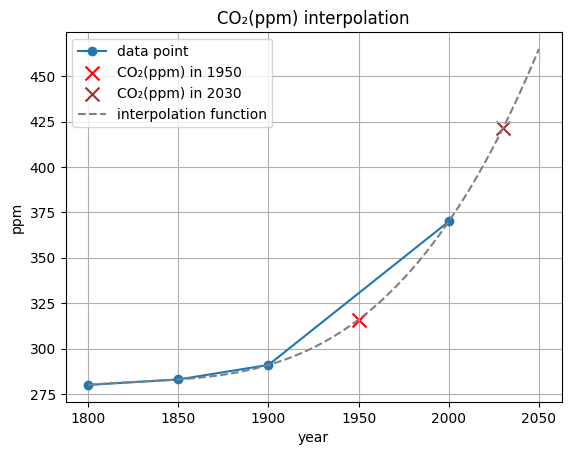

In [3]:
def Newton_interpolation(point, x, b):
    ans = 0
    for i in range(N):
        term = b[i]
        for j in range(i):
            term *= (point - x[j]) 
        ans += term
    return ans

def Lagrange_interpolation(point, x, y):
    Result = 0
    for i in range(N):
        Li = 1
        for j in range(N):
            if j != i:
                Li *= ((point - x[j]) / (x[i] - x[j])) 
        Li *= y[i]
        Result += Li
    return Result


N = 4
diff_f = np.zeros((N, N))
x = np.array([1800, 1850, 1900, 2000])
y = np.array([280, 283, 291, 370])

for i in range(N):
    for j in range(N-i):
        if i == 0:
            diff_f[j][i] = y[j]
        else:
            diff_f[j][i] = (diff_f[j+1][i-1] - diff_f[j][i-1]) / (x[j+i] - x[j])   

b = diff_f[0]
print("Newton ")
print(f"CO\u2082(1950): {Newton_interpolation(1950, x, b):.6f}")
print(f"CO\u2082(2030): {Newton_interpolation(2030, x, b):.6f}")
print('-----------------------------------------')
print("Lagrange ")
print(f"CO\u2082(1950): {Lagrange_interpolation(1950, x, y):.6f}")
print(f"CO\u2082(1950): {Lagrange_interpolation(2030, x, y):.6f}")


x_interpolation = np.linspace(1800, 2050, 100000)
y_interpolation = Lagrange_interpolation(x_interpolation, x, y)

plt.plot(x, y, marker='o', label='data point')
plt.scatter(1950, Lagrange_interpolation(1950, x, y), marker='x', color='red', label='CO\u2082(ppm) in 1950', s=100)  # 绘制数据点
plt.scatter(2030, Lagrange_interpolation(2030, x, y), marker='x', color='brown', label='CO\u2082(ppm) in 2030', s=100)  # 绘制数据点
plt.title('CO\u2082(ppm) interpolation')
plt.xlabel('year')
plt.ylabel('ppm')
plt.grid(True)
plt.plot(x_interpolation, y_interpolation, color='gray', linestyle='--', label= 'interpolation function')

plt.legend()
plt.show()

## Q3

### 3-a

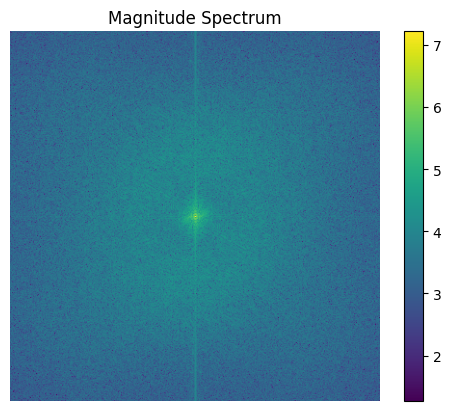

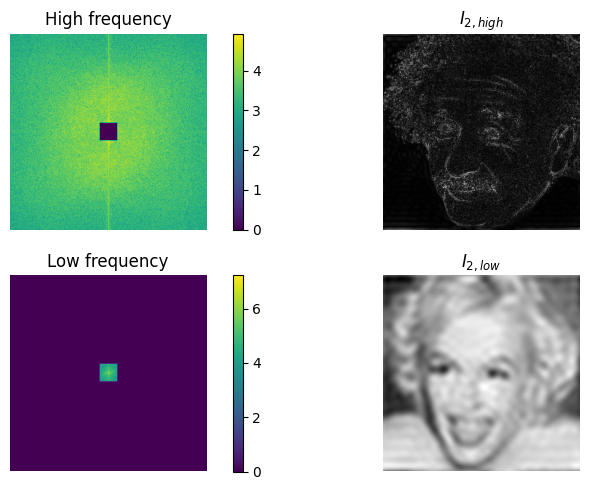

In [4]:
def Plot_Mutiple_Image(image_list, title_list, suptitle = 'QQ'):
    plt.figure(figsize=(14, 7))
    for i in range(len(image_list)):   
        plt.subplot(1, len(image_list), i+1)
        plt.imshow(image_list[i], cmap='gray')
        plt.title(title_list[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()


image = cv2.imread('Einstein-Monroe.jpg', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (384, 384))


f_transform = np.fft.fft2(image)
f_transform_shifted = np.fft.fftshift(f_transform)

magnitude_spectrum = np.log10(np.abs(f_transform_shifted))
plt.imshow(magnitude_spectrum)
plt.colorbar() 
plt.axis('off')
plt.title('Magnitude Spectrum')

rows, cols = image.shape

crow, ccol = rows // 2, cols // 2


threshold = 17
mask_low = np.zeros((rows, cols))
mask_low[crow-threshold:crow+threshold, ccol-threshold:ccol+threshold] = 1
f_transform_shifted_low = f_transform_shifted * mask_low
mask_high = np.ones((rows, cols))
mask_high[crow-threshold:crow+threshold, ccol-threshold:ccol+threshold] = 0
f_transform_shifted_high = f_transform_shifted * mask_high

image_low = np.abs(np.fft.ifft2(np.fft.ifftshift(f_transform_shifted_low))) 
image_high = np.abs(np.fft.ifft2(np.fft.ifftshift(f_transform_shifted_high)))  

high_spectrum = np.log10(np.abs(f_transform_shifted_high) + 1)
low_spectrum = np.log10(np.abs(f_transform_shifted_low) + 1)

plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.imshow(high_spectrum)
plt.title('High frequency')
plt.axis('off')
plt.colorbar()

plt.subplot(2, 2, 2)
plt.imshow(image_high,cmap='gray')
plt.title(r'$I_{2, high}$')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(low_spectrum)
plt.title('Low frequency')
plt.axis('off')
plt.colorbar()

plt.subplot(2, 2, 4)
plt.imshow(image_low,cmap='gray')
plt.title(r'$I_{2, low}$')
plt.axis('off')
plt.tight_layout()
plt.show()

由於圖片的頻率分成 $x$ $y$ 兩個方向，在這邊低頻的訊號我定義成 $x$ $y$ 方向 $\pm17$ 為低頻，$\pm17$ 以外為高頻

### 3-b

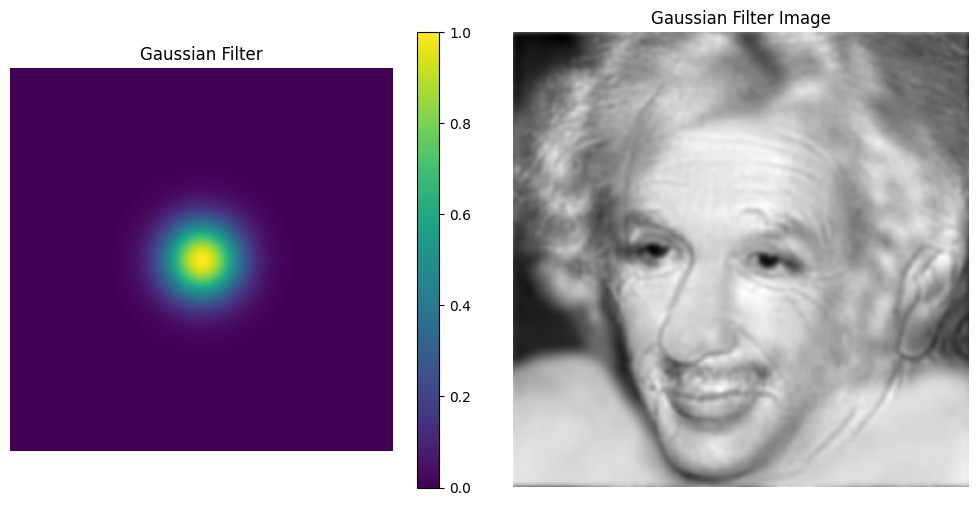

In [5]:
def Gauss_filter(FWHM):
    kernel_size = 384
    middle_size = kernel_size // 2
    x, y = np.mgrid[-middle_size:middle_size, -middle_size:middle_size]
    sigma = FWHM / (2*np.sqrt(2*np.log(2)))
    Gauss_Kernel = np.exp(-(x**2 + y**2)/(2*sigma**2)) / (2*np.pi*sigma**2)
    Gauss_Kernel = Gauss_Kernel / Gauss_Kernel.max()
    return Gauss_Kernel
Low_Pass_mask = Gauss_filter(FWHM=64)

Low_Pass_image = np.abs(np.fft.ifft2(np.fft.ifftshift(f_transform_shifted * Low_Pass_mask)))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(Low_Pass_mask)
plt.title('Gaussian Filter')
plt.axis('off')
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(Low_Pass_image, cmap='gray')
plt.title('Gaussian Filter Image')
plt.axis('off')
plt.tight_layout()
plt.show()

直接將 Gauss Filter 和 Magnitude Spectrum 對應的 pixel 直接相乘，即可得到過濾高頻後的 Magnitude Spectrum，鐘型內的值較高，鐘型外值較低

### 3-c

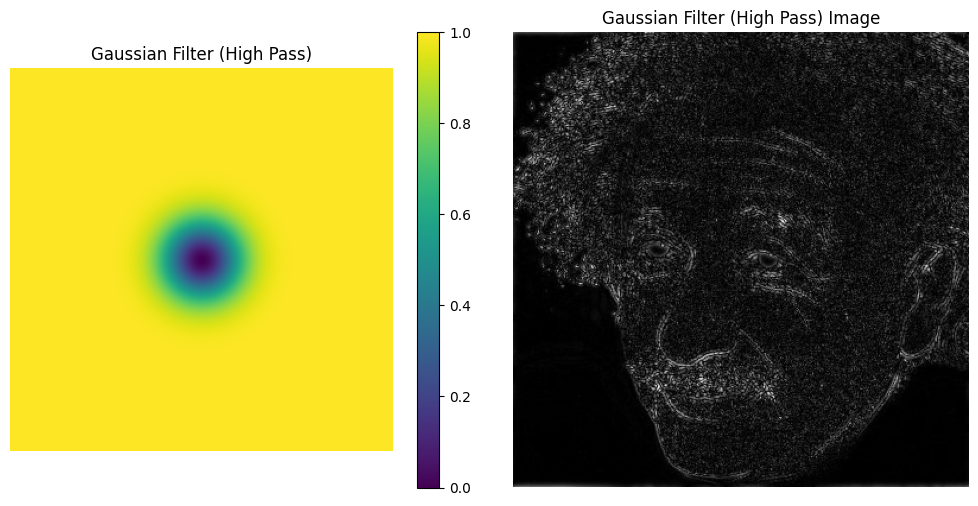

In [6]:
def LoG_filter(image, kernel_size, sigma):
    gaussian = cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)
    laplacian = cv2.Laplacian(gaussian, cv2.CV_64F)
    laplacian *= 255.0 / laplacian.max()
    return laplacian

def sobel_filter(image, Gauss_kernel_size, Sobel_kernel_size, dx, dy):
    sigma = 32 / (2*np.sqrt(2*np.log(2)))
    gaussian = cv2.GaussianBlur(image, (Gauss_kernel_size, Gauss_kernel_size), sigma)
    sobel_x = cv2.Sobel(gaussian, cv2.CV_64F, dx, 0, ksize= Sobel_kernel_size)
    sobel_y = cv2.Sobel(gaussian, cv2.CV_64F, 0, dy, ksize= Sobel_kernel_size)
    gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    gradient_magnitude *= 255.0 / gradient_magnitude.max()
    gradient_magnitude = cv2.convertScaleAbs(gradient_magnitude).astype('float')
    
    return gradient_magnitude

dx = 1
dy = 1  
reverse_mask = 1 - Low_Pass_mask
High_Pass_image = np.abs(np.fft.ifft2(np.fft.ifftshift(f_transform_shifted * reverse_mask))) 

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(reverse_mask)
plt.title('Gaussian Filter (High Pass)')
plt.axis('off')
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(High_Pass_image,cmap='gray')
plt.title('Gaussian Filter (High Pass) Image')
plt.axis('off')
plt.tight_layout()
plt.show()

承 3-b，高頻的 mask 只是 1 - mask(低頻)，過濾後的結果與 3-b 相反，變成鐘型外較高，鐘型內較低

### 3-d

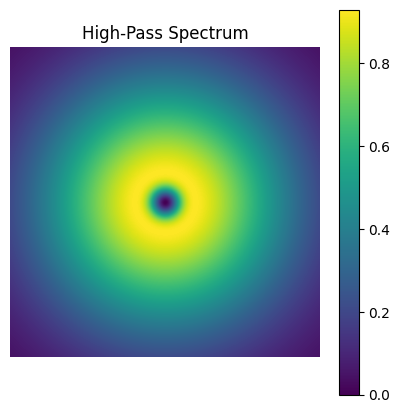

interactive(children=(IntSlider(value=30, description='FWHM', max=384, min=1), FloatSlider(value=1.0, descript…

<function __main__.update(FWHM, alpha, beta)>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from ipywidgets import IntSlider, interact, FloatSlider


initial_FWHM = 30
initial_ALPHA = 1
initial_BETA = 0.4

def update(FWHM, alpha, beta):
    Low_Pass_mask = Gauss_filter(FWHM)
    Low_Pass_image = np.abs(np.fft.ifft2(np.fft.ifftshift(f_transform_shifted * Low_Pass_mask)))
    High_Pass_image = np.abs(np.fft.ifft2(np.fft.ifftshift(f_transform_shifted * donut)))
    High_Pass_image = High_Pass_image.max() - High_Pass_image 
    High_Pass_image *= 255.0 / High_Pass_image.max()
    High_Pass_image = cv2.convertScaleAbs(High_Pass_image)
    High_Pass_image -= 96
    High_Pass_image = High_Pass_image.astype(float)
    
    Illusion_image = cv2.addWeighted(Low_Pass_image, alpha, High_Pass_image, beta, 0)
    # Illusion_image = cv2.GaussianBlur(image, (3, 3), 1)
    plt.figure(figsize=(5, 5))
    plt.imshow(Illusion_image, cmap='gray')
    plt.title('Gaussian Filter Image')
    plt.axis('off')
    plt.tight_layout()

Low_Pass_outside = Gauss_filter(256)
Low_Pass_inside = Gauss_filter(30)
donut = Low_Pass_outside - Low_Pass_inside

plt.figure(figsize=(5, 5))
plt.imshow(donut)
plt.title('High-Pass Spectrum')
plt.colorbar()
plt.axis('off')

interact(update,
         FWHM=IntSlider(value=initial_FWHM, min=1, max=384, step=1, description='FWHM'),
         alpha=FloatSlider(value=initial_ALPHA, min=0.0, max=1.0, step=0.01, description='α'),
         beta=FloatSlider(value=initial_BETA, min=0.0, max=1.0, step=0.01, description='β'))


這張合成圖有三個拉桿能調整 (需跑 ipynb 檔才能看到) FWHM、$\alpha$、$\beta$，其中 $\alpha$ 低頻圖片的權重，$\beta$ 為低頻圖片的權重，這張圖的高頻是 Gauss Filter 之 FHWM = 256 減去 Gauss Filter 之 FHWM = 30 後的區域，從上面的圖可觀察到高頻的部分其形狀像個甜甜圈，再來 FWHM 要調到接近 30 附近的時候低頻圖片的背景才會是瑪麗蓮夢露，FHWM 越大代表所接收的頻寬越大，越沒有過濾高頻的功能，因此在這邊 FHWM 不宜太大，否則導致幾乎看不見瑪麗蓮夢露的輪廓。

### 3-e
- FWHM 會大幅度地影響 Gauss Filter 的過濾能力，如果 FWHM 越小，越能過濾掉高頻訊號
- Einstein-Monroe 的高頻圖片於愛因斯坦頭髮的部分有點像雜訊
- 若要讓高頻的雜訊看起來平滑一點，可能高斯高通濾波器要多接收一些低頻，讓整體看起來更平滑